<a href="https://colab.research.google.com/github/Wondav/BMI-Data-Analysis/blob/main/BMI_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration of BMI Data and Statistical Analysis**


*   **Data Cleaning**
*   **Data Exploration**
*   **Statistical Analysis**



In [1]:
#Import necessary libraries for exploration and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Load data into pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BMI Data Analysis/bmi_data.csv.xls')

In [2]:
data.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,Female,21,65.78331,112.9925,18.357646
1,Female,35,71.51521,136.4873,18.762652
2,Female,27,69.39874,153.0269,22.338985
3,Male,24,68.21660,142.3354,21.504612
4,Female,18,67.78781,144.2971,22.077669


In [3]:
#Understand shape of the data i.e number of columns and rows
data.shape

(25000, 5)

In [4]:
#Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             25000 non-null  object 
 1   Age             25000 non-null  int64  
 2   Height(Inches)  24981 non-null  float64
 3   Weight(Pounds)  24984 non-null  float64
 4   BMI             24950 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 976.7+ KB


In [5]:
#Check for null values
data.isnull().sum()

Sex                0
Age                0
Height(Inches)    19
Weight(Pounds)    16
BMI               50
dtype: int64

In [6]:
#Drop rows with null values
data.dropna(inplace=True)

In [7]:
#Change data type of Sex to category
data['Sex'] = data['Sex'].astype('category')

#Convert Height from Inches to Meters, and Weight from Pounds to Kg, and store them in new columns
data['Height'] = data['Height(Inches)'] / 39.37
data['Weight'] = data['Weight(Pounds)'] / 2.204

#Classify BMI into Underweight, Normal Weight, Overweight
def func(x):
  if x < 18.5:
    return 'Underweight'
  elif x >= 18.5 and x <= 24.9:
    return 'Normal'
  elif x > 24.9 and x <=29.9:
    return 'Overweight'

data['BMI(Class)'] = data['BMI'].apply(func)
data['BMI(Class)'] = data['BMI(Class)'].astype('category')

In [8]:
#Simple statistics of the data
data.describe(include='all')

,Sex,Age,Height(Inches),Weight(Pounds),BMI,Height,Weight,BMI(Class)
count,24950,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950.000000,24950
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,Normal
freq,12563,NaN,NaN,NaN,NaN,NaN,NaN,17513
mean,NaN,26.497836,67.992821,127.077390,19.321368,1.727021,57.657618,NaN
std,NaN,5.190667,1.901551,11.663509,1.552091,0.048299,5.291973,NaN
min,NaN,18.000000,60.278360,78.014760,13.070879,1.531073,35.396897,NaN
25%,NaN,22.000000,66.704955,119.307525,18.278339,1.694309,54.132271,NaN
50%,NaN,27.000000,67.995700,127.152500,19.302160,1.727094,57.691697,NaN
75%,NaN,31.000000,69.271822,134.893550,20.357547,1.759508,61.203970,NaN


## Data Exploration

*   Distributions of Variables
*   Relationship among variables



Male      0.503527
Female    0.496473
Name: Sex, dtype: float64


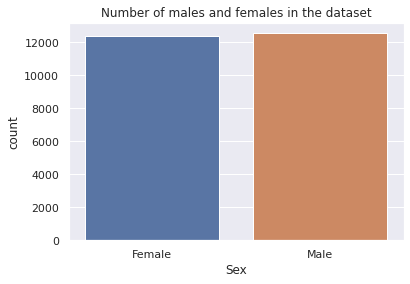

In [9]:
#Count the number of males and females in the dataset and visualize them
print(data['Sex'].value_counts(normalize=True))
sns.countplot(x = 'Sex', data=data)
plt.title('Number of males and females in the dataset')
plt.show()

In [10]:
#This function is used to calculate the Empirical Cumulative Distribution of a variable
def ecdf(var):
  x = np.sort(var)
  return x, np.arange(1, len(x)+1) / len(x)

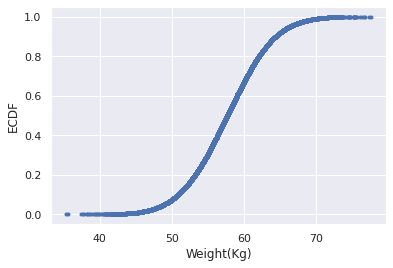

In [11]:
#Plotting the ECDF of the Weight variable
x_w, y_w = ecdf(data.Weight)

plt.plot(x_w, y_w, marker='.', linestyle='none')
plt.xlabel('Weight(Kg)')
plt.ylabel('ECDF')
plt.show()

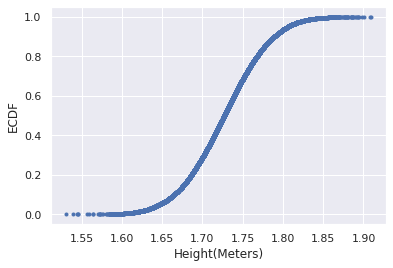

In [12]:
#Plotting the ECDF of the Height variable
x_h, y_h = ecdf(data.Height)

plt.plot(x_h, y_h, marker='.', linestyle='none')
plt.xlabel('Height(Meters)')
plt.ylabel('ECDF')
plt.show()

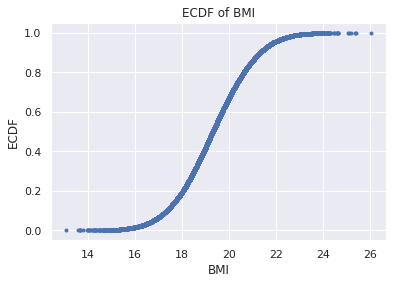

In [13]:
#Plotting the ECDF of the BMI variable
x_b, y_b = ecdf(data.BMI)

plt.plot(x_b, y_b, marker='.', linestyle='none')
plt.title('ECDF of BMI')
plt.xlabel('BMI')
plt.ylabel('ECDF')
plt.show()

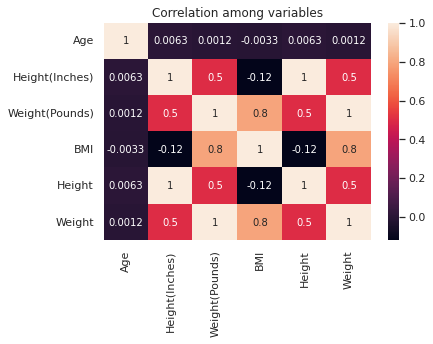

In [14]:
#Plotting the correlation between the variables

corr = data.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation among variables')
plt.show()

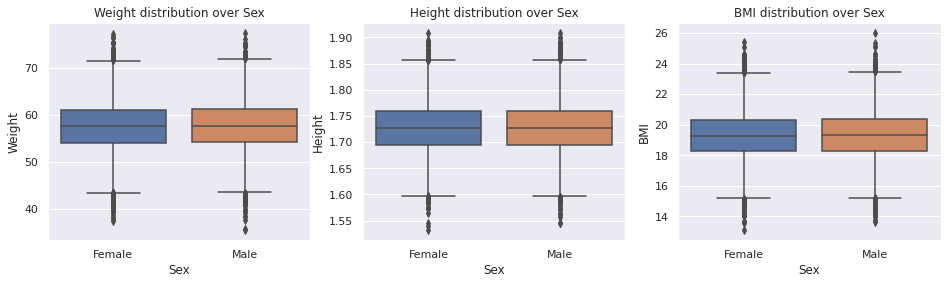

In [15]:
#Plotting the distributions of the Weight, Height, and BMI variables over the sex category i.e Male and Female

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
sns.boxplot(x='Sex', y='Weight', data=data, ax=ax[0])
ax[0].set_title('Weight distribution over Sex')

sns.boxplot(x='Sex', y='Height', data=data, ax=ax[1])
ax[1].set_title('Height distribution over Sex')

sns.boxplot(x='Sex', y='BMI', data=data, ax=ax[2])
ax[2].set_title('BMI distribution over Sex')

plt.show()

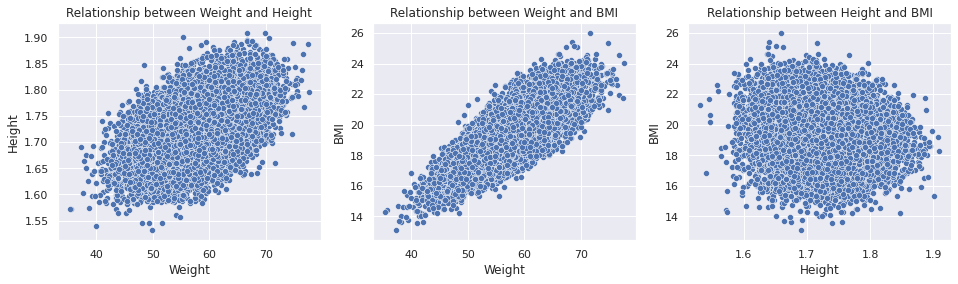

In [16]:
#Plotting the relationship between Weight, Height, and BMI variables using a scatter plot

fig1, ax1 = plt.subplots(1, 3, figsize=(16, 4))
sns.scatterplot(x='Weight', y='Height', data=data, ax=ax1[0])
ax1[0].set_title('Relationship between Weight and Height')

sns.scatterplot(x='Weight', y='BMI', data=data, ax=ax1[1])
ax1[1].set_title('Relationship between Weight and BMI')

sns.scatterplot(x='Height', y='BMI', data=data, ax=ax1[2])
ax1[2].set_title('Relationship between Height and BMI')

plt.show()

## Statistical Analysis


*   What are the features of Normal weighted people
*   What are the features of Underweight people



In [17]:
data_normal = data[data['BMI(Class)'] == 'Normal']

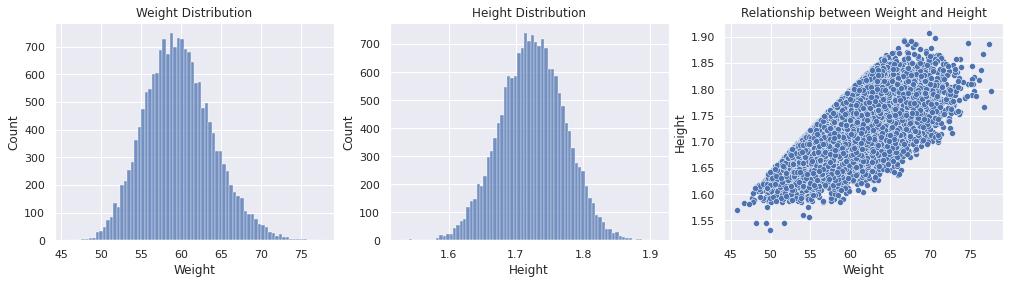

In [18]:
fig, ax =  plt.subplots(1, 3, figsize=(17, 4))

sns.histplot(data_normal['Weight'], ax=ax[0])
ax[0].set_title('Weight Distribution')

sns.histplot(data_normal['Height'], ax=ax[1])
ax[1].set_title('Height Distribution')

sns.scatterplot(x='Weight', y='Height', data=data_normal, ax=ax[2])
ax[2].set_title('Relationship between Weight and Height')

plt.show()

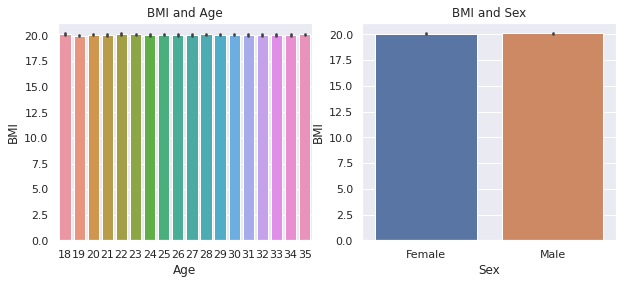

In [19]:
fig, ax =  plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x='Age', y='BMI', data=data_normal, ax=ax[0])
ax[0].set_title('BMI and Age')

sns.barplot(x='Sex', y='BMI', data=data_normal, ax=ax[1])
ax[1].set_title('BMI and Sex')

plt.show()

In [20]:
data_under=data[data['BMI(Class)'] == 'Underweight']

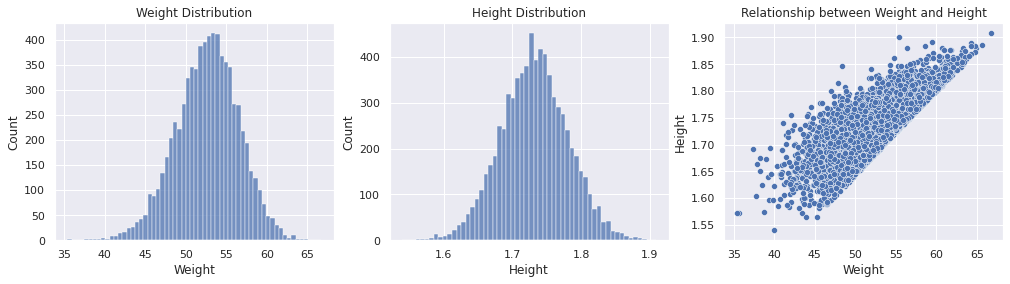

In [21]:
fig, ax =  plt.subplots(1, 3, figsize=(17, 4))

sns.histplot(data_under['Weight'], ax=ax[0])
ax[0].set_title('Weight Distribution')

sns.histplot(data_under['Height'], ax=ax[1])
ax[1].set_title('Height Distribution')

sns.scatterplot(x='Weight', y='Height', data=data_under, ax=ax[2])
ax[2].set_title('Relationship between Weight and Height')

plt.show()

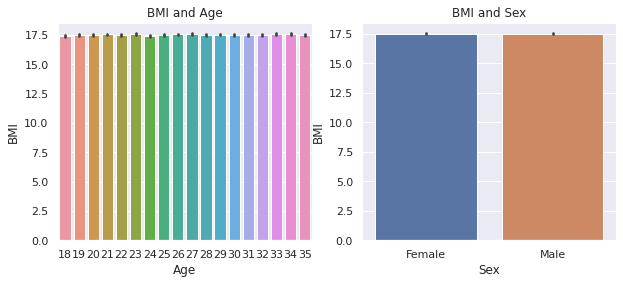

In [22]:
fig, ax =  plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x='Age', y='BMI', data=data_under, ax=ax[0])
ax[0].set_title('BMI and Age')

sns.barplot(x='Sex', y='BMI', data=data_under, ax=ax[1])
ax[1].set_title('BMI and Sex')

plt.show()